In [19]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import seaborn as sns
from rdkit import Chem
import dft_descriptors.featurisation as ft
import dft_descriptors.prepocessing as pp

import matplotlib.pyplot as plt

In [20]:
df_hte_bh = pd.read_excel("Dreher_and_Doyle_input_data.xlsx")
df_hte_suz = pd.read_excel("aap9112_Data_File_S1.xlsx")
df_dataset = pd.read_csv("../data_csv/Data_test11262021.csv")
df_dataset = df_dataset[df_dataset["Reactant Smile (C-O)"].isna() == False]
df_dataset = df_dataset[df_dataset["Mechanism"] != 'Review']
df_dataset.reset_index(inplace=True)
df2 = pp.preprocess(df_dataset)
def AL_preprocess(df):
    df["Lewis Acid"] = df["Lewis Acid"].fillna('NoLewisAcid')
    df["Lewis Acid"] = df["Lewis Acid"].replace('nan', 'NoLewisAcid')
    Lewis_Acids_to_drop = ['O=C(O[Cs])O[Cs]', 'Cl[Cs]', 
                       'O=S(=O)(O[Sc](OS(=O)(=O)C(F)(F)F)OS(=O)(=O)C(F)(F)F)C(F)(F)F', 
                       'F[Cs]', 'O=P(O[Na])(O[Na])O[Na]', '[Rb+]',
                       'CC(C)(C)C(=O)O[Cs]', '[Cs+]', 'CC(=O)O[Cu]OC(C)=O', 'F[Sr]F']
    for al in Lewis_Acids_to_drop:
        df = df[df["Lewis Acid"] != al]
    
    return df.reset_index(drop=True)

df2 = AL_preprocess(df2)

In [21]:
X, y, DOIs, mechanisms, origin = ft.process_dataframe_dft(df2, data_path="../data_csv/", origin=False)

NoLigand


In [22]:
y_bh = df_hte_bh["Output"]
y_suz = df_hte_suz["Product_Yield_PCT_Area_UV"]
y_dataset = y

In [110]:
y_bh = df_hte_bh["Output"]
y_suz = df_hte_suz["Product_Yield_PCT_Area_UV"]
y_dataset = y

#SciFinder query : 
yields = ["<10%", "10-29%", "30-49%", "50-69%", "70-79%", "80-89%", "90-100%"]
yields_lim = [0, 10, 29, 49, 69, 79, 89, 100]
yields_count =  [ 25, 78, 243, 569, 419, 436, 433]
Y_sciF = [np.random.randint(yields_lim[i], yields_lim[i+1]) for i in range(len(yields_count)) for j in range(yields_count[i])]

In [23]:
y_suz

0        4.764109
1        4.120962
2        2.583837
3        4.443171
4        1.949874
          ...    
5755    47.211431
5756     0.000000
5757    31.443681
5758     0.000000
5759    54.197376
Name: Product_Yield_PCT_Area_UV, Length: 5760, dtype: float64

In [114]:
Y = np.concatenate((np.array(y_dataset), np.array(y_suz), np.array(y_bh), np.array(Y_sciF)))
Origin = np.concatenate((np.array(origin), np.array(["HTE Suzuki" for i in range(len(y_suz))]),
                        np.array(["HTE Buchwald" for i in range(len(y_bh))]),
                       np.array(["SciFinder query" for i in range(len(Y_sciF))])))
Origin2 = np.concatenate((np.array(["NiCO-lit" for i in range(len(y_dataset))]),
                          np.array(["HTE Suzuki" for i in range(len(y_suz))]),
                          np.array(["HTE Buchwald" for i in range(len(y_bh))]),
                         np.array(["SciFinder query" for i in range(len(Y_sciF))])))

In [116]:
# Yield distribution according to scope/optimization
# virer les reviews

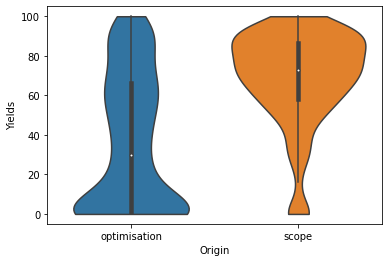

In [117]:
display_df =  pd.DataFrame(zip(y_dataset, origin, mechanisms), columns =['Yields', 'Origin', 'Mechanism'])
sns.violinplot(y="Yields", data=display_df, x='Origin',  kind="swarm", cut=0)
plt.savefig('yields_dataset_scope_opt.svg', dpi=300, format='svg',
        bbox_inches='tight' )

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


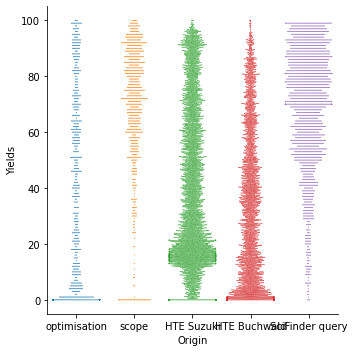

In [118]:
display_df1 =  pd.DataFrame(zip(Y, Origin), columns =['Yields', 'Origin'])
sns.catplot(y="Yields", data=display_df1, x='Origin',  kind="swarm", s = 1)
plt.savefig('yields_scope_opt.svg', dpi=300, format='svg', bbox_inches='tight' )

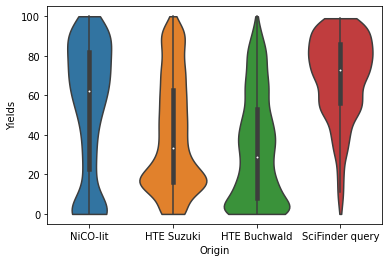

In [119]:
display_df2 =  pd.DataFrame(zip(Y, Origin2), columns =['Yields', 'Origin'])
sns.violinplot(y="Yields", data=display_df2, x='Origin',  kind="swarm", cut=0)
plt.savefig('yields_global.svg', dpi=300, format='svg',
        bbox_inches='tight' )

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaco

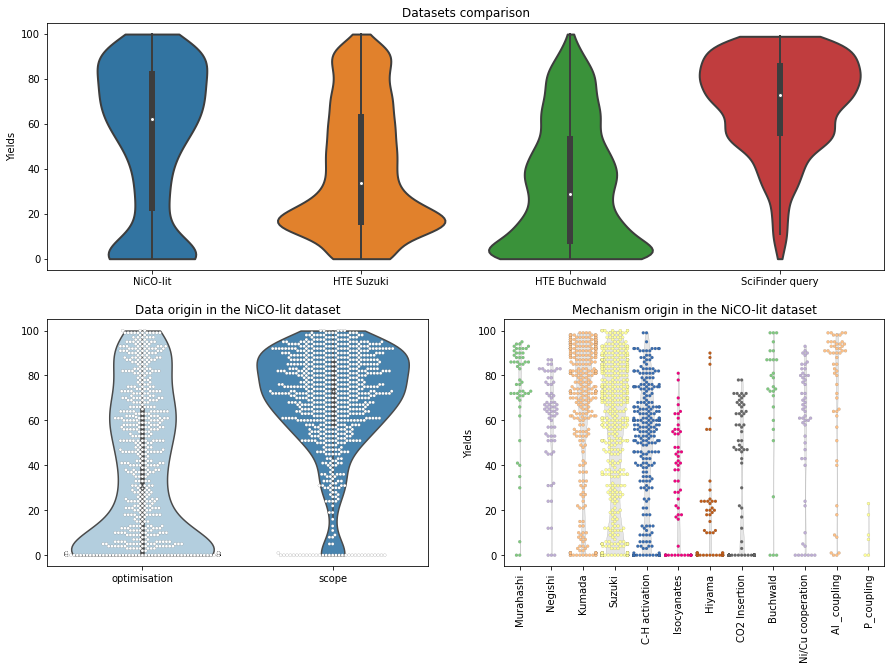

In [170]:
#plt.figure()
fig, ax = plt.subplots(2,2, figsize=(15, 10))

ax[0,1] = plt.subplot(211)

sns.violinplot(y="Yields", data=display_df2, x='Origin',  kind="swarm", cut=0, ax = ax[0,1], 
               linewidth=2) #scale='count')
for tick in ax[0,1].get_xticklabels():
    tick.set_rotation(0)
ax[0,1].set_title("Datasets comparison")
ax[0,1].set_xlabel("")

sns.swarmplot(ax=ax[1,0], y="Yields", data=display_df, x='Origin', color='white', s = 3, 
              linewidth=0.1, dodge=False, edgecolor='black', )
sns.violinplot(y="Yields", data=display_df, x='Origin',  kind="swarm", cut=0, 
               ax = ax[1,0], palette='Blues', scale='count')
ax[1,0].set_title("Data origin in the NiCO-lit dataset")
ax[1,0].set_xlabel("")
ax[1,0].set_ylabel("")

#sns.violinplot(y="Yields", data=display_df, x='Mechanism',  kind="swarm", cut=0, ax = ax[2], palette='Accent',
#              linewidth=0)

sns.swarmplot(ax=ax[1,1], y="Yields", data=display_df, x='Mechanism', palette='Accent', s = 3,
              linewidth=0.1, dodge=False)
sns.violinplot(ax=ax[1,1], y="Yields", data=display_df, x='Mechanism',
                    inner=None, color=".9", cut=0, scale='count', linewidth=0.2)

#plt.xticks(rotation=80)
ax[1,1].set_title("Mechanism origin in the NiCO-lit dataset")
for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(90)
ax[1,1].set_xlabel("")
#ax[1,0].set_ylabel("")

plt.savefig('yields_global.svg', dpi=300, format='svg',
     bbox_inches='tight' )

In [142]:
list(display_df["Mechanism"].unique())

['Murahashi',
 'Negishi',
 'Kumada',
 'Suzuki',
 'C-H activation',
 'Isocyanates',
 'Hiyama',
 'CO2 Insertion',
 'Buchwald',
 'Ni/Cu cooperation',
 'Al _coupling',
 'P_coupling']

In [109]:
display_df2

,Yields,Origin
0,73.000000,NiCO-lit
1,62.000000,NiCO-lit
2,0.000000,NiCO-lit
3,76.000000,NiCO-lit
4,66.000000,NiCO-lit
...,...,...
11242,4.344677,HTE Buchwald
11243,47.156275,HTE Buchwald
11244,0.701552,HTE Buchwald
11245,15.561565,HTE Buchwald
